# Model Building

In [273]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [274]:
# read in data
df = pd.read_csv('nba_salary_cleaned.csv')
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Precious Achiuwa,PF,21,MIA,61,4,737,124,228,0,...,73,135,208,29,20,28,43,91,304,2582160
1,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0,...,0,3,3,2,0,0,0,1,2,449115
2,Steven Adams,C,27,NOP,58,58,1605,189,308,0,...,213,301,514,111,54,38,78,113,438,29592695
3,Bam Adebayo,C,23,MIA,64,64,2143,456,800,2,...,142,431,573,346,75,66,169,145,1197,5115492
4,LaMarcus Aldridge,C,35,TOT,26,23,674,140,296,31,...,19,99,118,49,11,29,27,47,352,17628340


In [275]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA',
       '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Salary'],
      dtype='object')

In [276]:
# reomove player's name as it is not relevant for this project
df_model = df[['Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 
                   'BLK', 'TOV', 'PF', 'PTS', 'Salary']]

In [277]:
# get dummy variables for categorical variables
df_dum = pd.get_dummies(df_model, drop_first = True)

print("number of columns before: ", len(df_model.columns))
print("number of columns after: ", len(df_dum.columns))

number of columns before:  24
number of columns after:  56


In [278]:
df_dum.head()

,Age,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,...,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
0,21,61,4,737,124,228,0,1,124,227,...,0,0,0,0,0,0,0,0,0,0
1,24,7,0,18,1,8,0,2,1,6,...,0,0,0,0,0,0,0,0,0,0
2,27,58,58,1605,189,308,0,3,189,305,...,0,0,0,0,0,0,0,0,0,0
3,23,64,64,2143,456,800,2,8,454,792,...,0,0,0,0,0,0,0,0,0,0
4,35,26,23,674,140,296,31,80,109,216,...,0,0,0,0,0,0,0,1,0,0


In [279]:
# test train split
from sklearn.model_selection import train_test_split

x =  df_dum.drop('Salary', axis = 1)
y = df_dum.Salary.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train's shape ", x_train.shape)
print("y_train's shape ", y_train.shape)
print("x_test's shape ", x_test.shape)
print("y_test's shape ", y_test.shape)

x_train's shape  (373, 55)
y_train's shape  (373,)
x_test's shape  (94, 55)
y_test's shape  (94,)


In [280]:
# building linear model using statsmodel 
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

This is a underlying basic model that I compare with other models

In [281]:
model = sm.OLS(y_train,x_train)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     15.55
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.03e-60
Time:                        11:12:53   Log-Likelihood:                -6284.7
No. Observations:                 373   AIC:                         1.267e+04
Df Residuals:                     321   BIC:                         1.288e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.106e+07   2.89e+06     -3.833      0.000   -1.67e+07   -5.38e+06
Age         6.122e+05   8.15e+04      7.508      0.000    4.52e+05    7.73e+05
G          -4.238e+04   4.25e+04     -0.997      0.320   -1.26e+05    4.13e+04
GS           1.27e+05   3.03e+04      4.191      0.000    6.74e+04    1.87e+05
MP         -1.205e+04   2861.448     -4.212      0.000   -1.77e+04   -6423.950
FG         -8275.8102   1.06e+04     -0.777      0.437   -2.92e+04    1.27e+04
FGA         9070.6277   6543.312      1.386      0.167   -3802.564    2.19e+04
3P          1.077e+04   2.33e+04      0.463      0.644    -3.5e+04    5.65e+04
3PA          589.9510    1.4e+04      0.042      0.966   -2.69e+04    2.81e+04
2P         -1.905e+04   2.67e+04     -0.714      0.476   -7.15e+04    3.34e+04
2PA         8480.6767    1.2e+04      0.705      0.481   -1.52e+04    3.21e+04
FT          1.741e+04      3e+04      0.580      0.563   -4.17e+04    7.65e+04
FTA        -1.342e+04   2.87e+04     -0.467      0.641      -7e+04    4.31e+04
ORB        -1099.8325   1.29e+04     -0.085      0.932   -2.65e+04    2.43e+04
DRB         1.196e+04   8953.175      1.336      0.183   -5653.303    2.96e+04
TRB         1.086e+04   5478.115      1.983      0.048      83.633    2.16e+04
AST         3.037e+04   8783.834      3.457      0.001    1.31e+04    4.76e+04
STL         5.029e+04   2.88e+04      1.747      0.082   -6354.722    1.07e+05
BLK         5.165e+04   2.22e+04      2.323      0.021    7913.453    9.54e+04
TOV         6366.6092   2.49e+04      0.256      0.798   -4.25e+04    5.53e+04
PF          -3.32e+04    1.5e+04     -2.220      0.027   -6.26e+04   -3776.528
PTS         1.163e+04   9509.407      1.223      0.222   -7081.560    3.03e+04
Pos_PF      1.381e+06   1.12e+06      1.229      0.220    -8.3e+05    3.59e+06
Pos_PG     -2.703e+05   1.32e+06     -0.205      0.838   -2.87e+06    2.33e+06
Pos_SF      7.372e+05   1.21e+06      0.611      0.541   -1.64e+06    3.11e+06
Pos_SG     -1.737e+05   1.25e+06     -0.139      0.890   -2.63e+06    2.29e+06
Tm_BOS       1.26e+06   2.35e+06      0.537      0.592   -3.36e+06    5.88e+06
Tm_BRK     -1.632e+06   2.29e+06     -0.714      0.476   -6.13e+06    2.87e+06
Tm_CHI     -2.495e+06   2.54e+06     -0.984      0.326   -7.48e+06    2.49e+06
Tm_CHO     -7.417e+05   2.27e+06     -0.327      0.744   -5.21e+06    3.73e+06
Tm_CLE     -5.569e+05   2.47e+06     -0.225      0.822   -5.42e+06     4.3e+06
Tm_DAL     -2.225e+05   2.48e+06     -0.090      0.929    -5.1e+06    4.66e+06
Tm_DEN     -6.526e+05   2.48e+06     -0.263      0.793   -5.54e+06    4.23e+06
Tm_DET     -8.075e+05   2.35e+06     -0.344      0.731   -5.43e+06    3.82e+06
Tm_GSW      3.944e+05   2.39e+06      0.165      0.869    -4.3e+06    5.09e+06
Tm_HOU      6.317e+05   2.61e+06      0.242      0.809   -4.51e+06    5.77e+06
Tm

Let's see if removing some of the unrelevant columns will help improve the model score.

In [282]:
# choose only columns that have lower p value than 0.05
columns_used = ['const', 'Age', 'GS', 'MP', 'TRB', 'AST', 'BLK', 'PF']

In [283]:
# create another model with selected columns and see if the R-squared value will be improved
model2 = sm.OLS(y_train,x_train[columns_used])
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     77.09
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           4.46e-68
Time:                        11:12:53   Log-Likelihood:                -6347.6
No. Observations:                 373   AIC:                         1.271e+04
Df Residuals:                     365   BIC:                         1.274e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.201e+07      2e+06     -6.014      0.000   -1.59e+07   -8.08e+06
Age         5.775e+05   7.84e+04      7.362      0.000    4.23e+05    7.32e+05
GS          1.613e+05   2.71e+04      5.958      0.000    1.08e+05    2.15e+05
MP         -2789.3627   1485.934     -1.877      0.061   -5711.429     132.704
TRB         1.323e+04   4661.499      2.839      0.005    4065.306    2.24e+04
AST         4.725e+04   5068.699      9.321      0.000    3.73e+04    5.72e+04
BLK         3.197e+04   2.14e+04      1.492      0.136   -1.02e+04    7.41e+04
PF         -5.135e+04   1.39e+04     -3.695      0.000   -7.87e+04    -2.4e+04
==============================================================================
Omnibus:                       45.321   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.597
Skew:                           0.741   Prob(JB):                     3.84e-17
Kurtosis:                       4.634   Cond. No.                     7.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Turns out it didn't really improve.

Let's try sklearn linear regression next.
I am going to use cross validation to compare the scores of models

## sklearn Linear Regression

In [284]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [285]:
# cross validation for sklearn linear regression
np.mean(cross_val_score(reg, x_train, y_train, cv=5))

0.5225314491906369

Let's see if the score gets better if I remove some of the unrelevant columns (high p value).

## Lasso & Ridge

/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.547e+15, tolerance: 2.764e+12
  model = cd_fast.enet_coordinate_descent(
/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.234e+15, tolerance: 2.494e+12
  model = cd_fast.enet_coordinate_descent(
/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.794e+15, tolerance: 2.423e+12
  model = cd_fast.enet_coordinate_descent(
/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.542e+15, tolerance: 2.764e+12
  model = cd_fast.enet_coordinate_descent(
/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

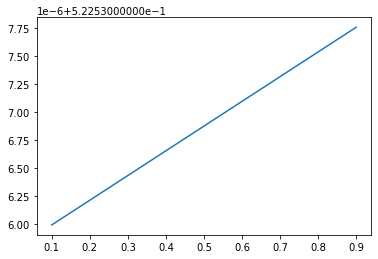

In [286]:
# Lasso Regression
# Need to choose the best alpha value
alpha_lasso = []
error_lasso = []

for i in range(1, 10):
    alpha_lasso.append(i/10)
    lml = Lasso(alpha = (i/10))
    error_lasso.append(np.mean(cross_val_score(lml, x_train, y_train, cv=5)))

plt.plot(alpha_lasso, error_lasso)

Seems like Lasso is not suitable for this case. Let's try Ridge regression

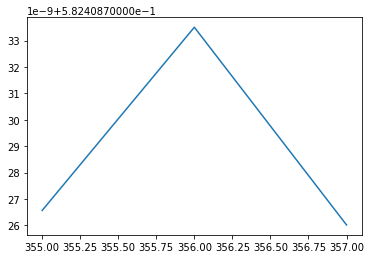

In [310]:
# Ridge Regression
# Need to choose the best alpha value
alpha_ridge = []
error_ridge = []

for i in range(355, 358):
    alpha_ridge.append(i)
    lmr = Ridge(alpha = i)
    error_ridge.append(np.mean(cross_val_score(lmr, x_train, y_train, cv=5)))

plt.plot(alpha_ridge, error_ridge)

In [312]:
# based on the plot above, the best alpha value is 365
lmr = Ridge(alpha = 365)
lmr.fit(x_train, y_train)

Ridge(alpha=365)

Let's try **Random Forest Regressor** Next.

## Random Forest Regressor

In [288]:
# iport liblaries for Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [289]:
# cross validation for random forest model
np.mean(cross_val_score(rf, x_train, y_train, cv= 3))

0.6395060693111148

Let's tune the hyperparameters!

In [290]:
# check the default hyper parameters
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [291]:
# using RandomizedSearchCV, choose candidates for each important parameters
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [300]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [293]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [294]:
np.mean(cross_val_score(rf_random.best_estimator_, x_train, y_train, cv=5))

0.6137636040715357

Tune further using GridSearch! The starting value is based on the randomized grid search

In [295]:
# tune the hyperparameters with GridSearchCV
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 1200, stop = 1600, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(50, 90, num = 5)]
min_samples_split = [2, 3]
min_samples_leaf = [2, 3]
bootstrap = [True]

# Create the random grid
grid_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gs = GridSearchCV(rf,grid_search,cv=3)
gs.fit(x_train,y_train)

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   1.8s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   1.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, max_depth=2

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   1.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.9s
[CV] END bootstrap=True, max_depth=2

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   5.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   5.7s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   1.9s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   5.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   1.8s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.3s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.8s
[CV] END bootstrap=True, max_depth=80, m

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [50, 60, 70, 80, 90],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600]})

In [296]:
gs.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [297]:
# cross validation for the random forest model with tuned hyperparameters
np.mean(cross_val_score(gs.best_estimator_, x_train, y_train, cv=5))

0.6271598531741652

## model evaluation

So far we've tried couple different models: statsmodel, sklearn linear model, lasso, ridge, random forest. Let's see how they perform on test set.

In [298]:
# add constant column for test set too
x_test = sm.add_constant(x_test)

In [313]:
# get prediction for the test set
tpred_reg = reg.predict(x_test)
tpred_lmr = lmr.predict(x_test)
tpred_rf = rf.predict(x_test)
tpred_rf_best = gs.best_estimator_.predict(x_test)

In [314]:
from sklearn.metrics import r2_score
r2_reg = r2_score(y_test,tpred_reg)
r2_lmr = r2_score(y_test, tpred_lmr)
r2_rf = r2_score(y_test,tpred_rf)
r2_rf_best = r2_score(y_test,tpred_rf_best)

In [315]:
print('R2 Score for each model')
print('--------------------------------')
print('for sklearn linear regression: ', r2_reg)
print('for Ridge regression: ', r2_lmr)
print('for Random Forest: ', r2_rf)
print('for Random Forest with GridSearchCV : ', r2_rf_best)

R2 Score for each model
--------------------------------
for sklearn linear regression:  0.47944378658100184
for Ridge regression:  0.5338268034445834
for Random Forest:  0.7701392913346699
for Random Forest with GridSearchCV :  0.7650276480941876


## Conclusion
Based on the R2 score for each model, Random Forest model without any tuned hyperparameters gave us the best score. 